# 탐색적 데이터 분석(EDA)
- Exploring Data Analysis
- 데이터 특성을 파악하고 상세화
- 데이터 유형(속성)에 따라 데이터의 특성을 파악한 후 분석 방향 결정

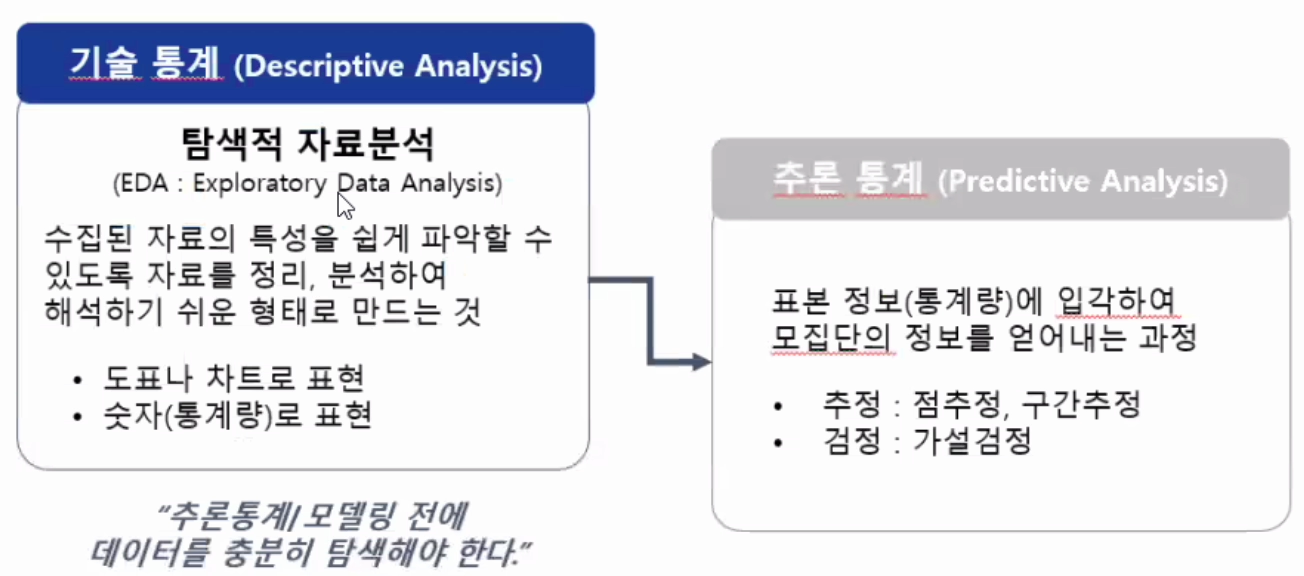

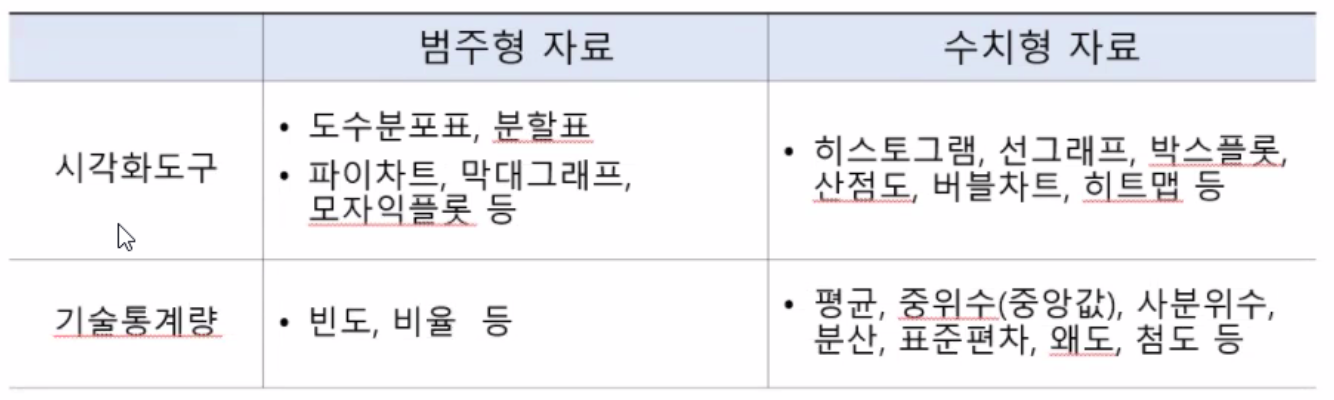

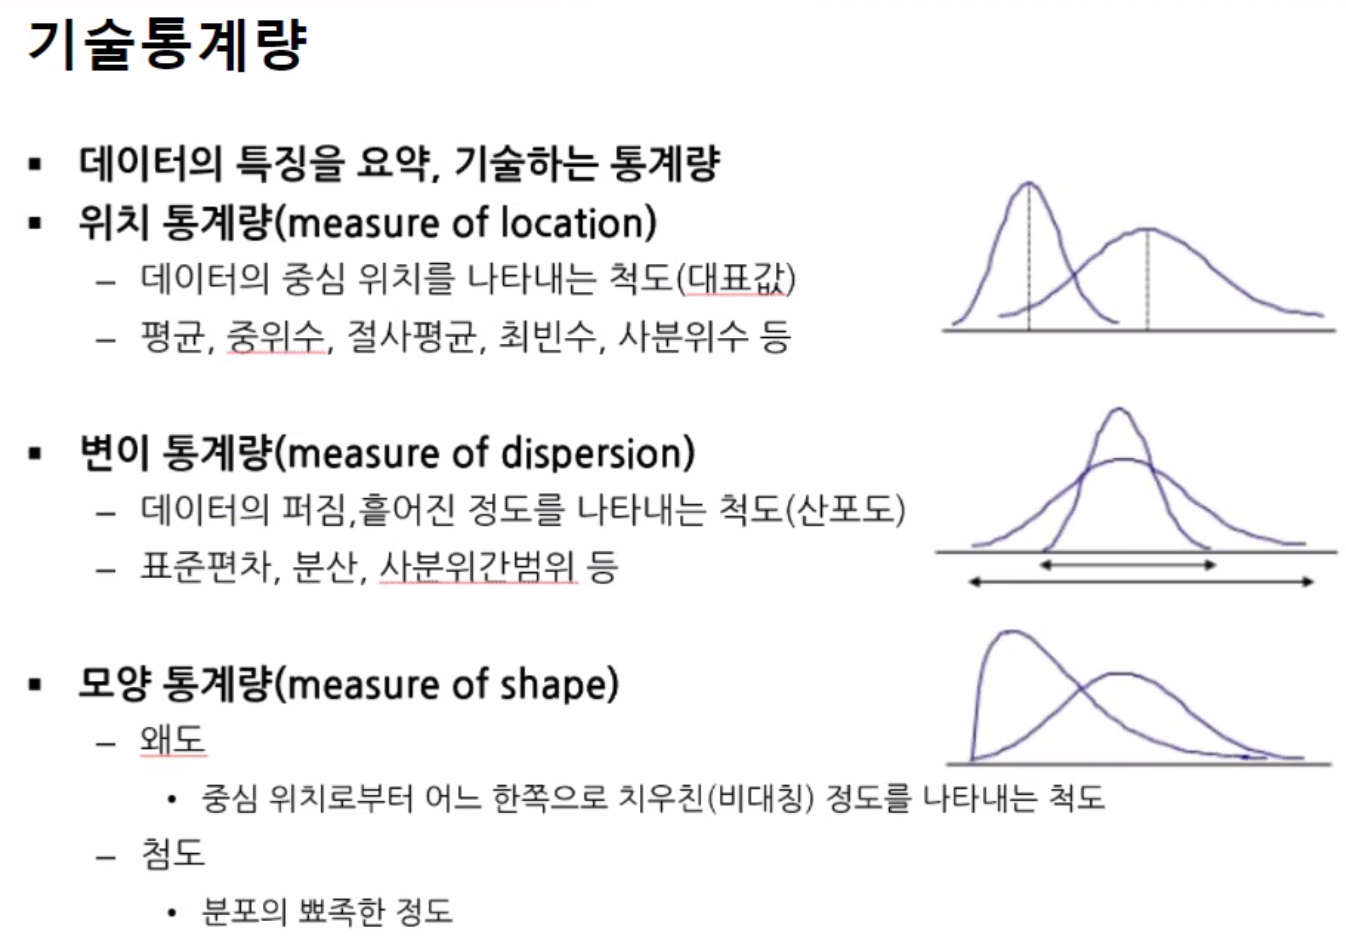

In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import *
import scipy as sp

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

In [2]:
# 여러 변수 출력 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

**참고 사이트**
- scipy.stats
    - https://docs.scipy.org/doc/scipy/reference/stats.html
- numpy의 statistics
    - https://numpy.org/doc/stable/reference/routines.statistics.html
- math
    - https://docs.python.org/ko/3/library/math.html#number-theoretic-and-representation-functions

## 위치 통계량(measure of location)
- 중심 경향성

### 평균(mean)
- 가장 많이 사용되는 대표값
    - 모든 데이터의 합을 데이터의 개수로 나눈 값(산술평균)
- 특징
    - 계산이 쉽고, 수학적으로 활용하기 편리하며 각 자료에 대해 유일한 값을 가짐
    - 분산의 계산, 모수 추정, 가설검정 등 통계분석의 대표적인 통계량으로 널리 사용됨
    - 데이터의 극단적인 값이 포함될 경우 평균이 왜곡되는 경향이 있음
    - 이러한 경우, 대표값으로 중앙값을 사용

**산술 평균(arithmetic mean)**

In [4]:
x = [1,2,3,4,5]
np.mean(x)
np.array(x).mean()
pd.Series(x).mean()

3.0

3.0

3.000

- 교재, 31쪽 예제

In [5]:
df = pd.read_csv('./data/ch2_scores_em.csv',
                index_col = 'student number')

# df의 처음 5행 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [6]:
df.shape

(50, 2)

In [8]:
# sum(),len() 함수를 이용하여 산술평균 계산
# 영어 과목의 평균 계산
sum(df['english'])/len(df['english'])

58.380

In [9]:
# numpy의 mean() 함수를 이용하여 산술평균 계산
np.mean(df['english'])

58.380

In [10]:
# pandas의 데이터프레임에서 mean() 함수를 이용하여 산술평균 계산
df['english'].mean()

58.380

In [11]:
# scipy의 mean() 함수를 이용하여 산술평균 계산
sp.mean(df['english'])

/var/folders/qk/0ttws_bs3s1fydtrkp_804nc0000gn/T/ipykernel_17956/1100671673.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(df['english'])


58.380

**기하평균**
- n개의 양수 값을 모두 곱한 것의 n 제곱근
- 성장률의 평균
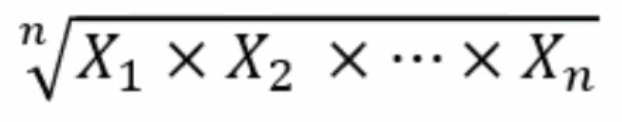

예. 회사의 연 평균 매출 증가율
- 1차년도에 200%, 2차년도에 800%, 3차년도에 300% 성장을 했다면 3개년도의 연 평균 성장율은?

In [12]:
data = [2,8,3]

In [13]:
# 산술 평균
np.mean(data)

4.333333333333333

- 매년 평균 430% 성장으로 나타남
    - 1차년도에 430% 2차년도 430% 3차년도 430% 라면 전년대비 성장
    - 이 회사는 3개년 동안 430 * 430 * 430 성장한게 되므로 총 79,507,000 성장한 상황이 됨
- 실제 성장은 200 * 800 * 300 이므로 48,000,000 성장한 것과는 차이가 많이 남
- 곱하기를 해서 나오는 값에 대한 평균은 산술평균보다는 기하평균 사용

In [15]:
# 기하 평균
# math.prod(data) : data를 다 곱해줌
math.prod(data) **(1/len(data))


3.634

In [16]:
# scipy.stats.gmean(a[,axis,dtype,weights]) 이용하여 기하 평균 계산
gmean(data)

3.634241185664279

**조화 평균**
- 비율 및 변화율에 대한 평균을 계산할 때 사용
- 주어진 수들의 역수들의 산술평균에서 역수를 취한 값

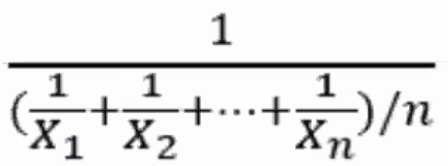

**예.**
100km 떨어진 도시까지 차로 다녀오면서 가는 길에는 시속 80km, 오는 길은 시속 120km로 달렸을 때 평균 속력은 얼마나 되는가?
- 움직인 거리 : 200km
- 움직인 시간 : 100/80 + 100/120

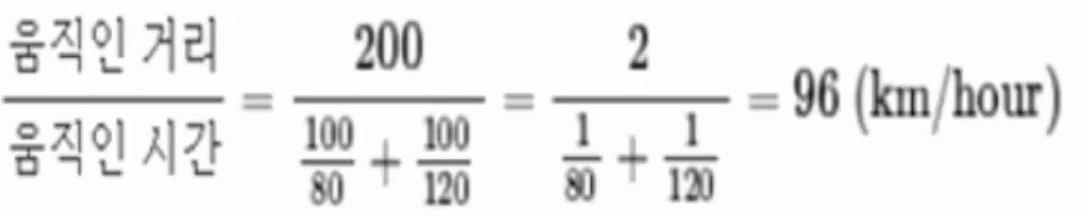

In [20]:
# 조화평균 계산
data = np.array([80,120])
1/data
len(data)/np.sum(1/data) # 역수의 합을 분모

array([0.013, 0.008])

95.99999999999999

In [19]:
# scipt.stat.hmean(a[,axis,dtype]) 이용하여 조화평균 계산
hmean(data)

95.99999999999999

**가중평균**
- numpy.average(a[,axis,weights,returned]) 이용

In [23]:
np.average(np.arange(1,5))
np.average(np.arange(1,11), weights=np.arange(10,0,-1))

2.5

4.0

In [24]:
np.mean(np.arange(1,11))

5.5

**중앙값(median)**
- 중위수, 중간값
- 데이터를 크기 순서대로 나열할 때 가운데 위치하는 숫자
- 데이터의 개수가 홀수일 경우 : 가운데 위치하는 유일한 숫자
- 데이터의 개수가 짝수일 경우 : 가운데 위치하는 2개의 숫자의 평균값

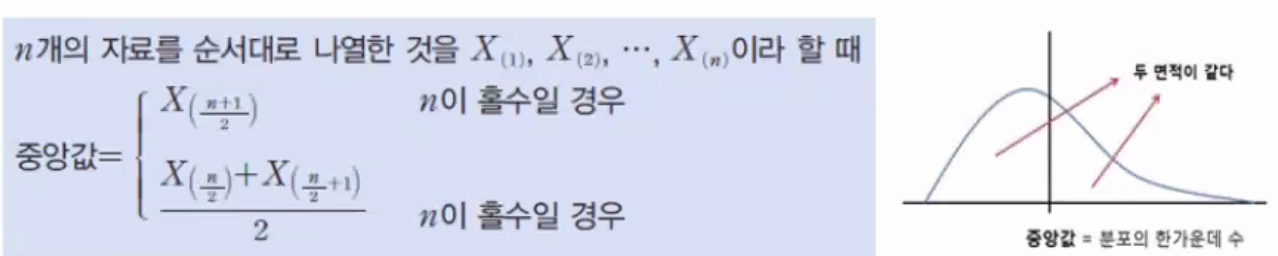

- 특징
    - 극단적인 값에 영향을 받지 않는 장점
    - 가운데 위치하는 한 개 또는 두 개의 데이터만으로 계산
    
    
- 극단적인 값이 포함된 데이터의 대표값 비교
    - 평균 : 모든 데이터를 전부 고려하여 계산한 값, 무게 중심
    - 중앙값 : 데이터의 개수와 순서만을 고려하여 계산
    
    
- 예. 세 개의 추(10kg,20kg,60kg)가 있는 경우
    - 평균은 세 무게의 균형을 나타내는 시소의 중심
    - 중앙값은 개수(3)의 중앙(2)을 나타냄
    - 만약 60kg의 추를 80kg으로 대체할 경우 평균을 나타내는 시소의 중심은 오른쪽으로 이동하지만, 중앙값은 변화하지 않고 그대로 20kg이 됨
    
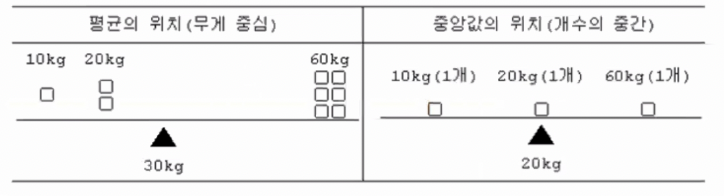

In [25]:
# 예제 데이터
scores = np.array(df['english'])
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66])

In [26]:
# 순서 통계량
sorted_scores = np.sort(scores)
sorted_scores

array([37, 37, 41, 42, 42, 45, 47, 47, 48, 49, 51, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 57, 57, 57, 57, 57, 58, 61, 61, 62, 62, 62, 63, 64, 64,
       65, 65, 65, 65, 66, 66, 66, 67, 68, 69, 70, 70, 71, 73, 75, 79])

In [28]:
# median 계산식
n = len(sorted_scores)
if n%2 == 0 :
    # 짝수인 경우
        x1 = sorted_scores[n//2-1]
        x2 = sorted_scores[n//2]
        median = (x1+x2)/2
else :
    # 홀수인 경우
    median = sorted_scores[n+1//2-1]
median

57.5

In [29]:
sorted_scores[24], sorted_scores[25]

(57, 58)

In [30]:
# numpy의 median() 함수
np.median(scores)

57.5

In [31]:
# pandas.DataFrame의 median() 함수
df['english'].median()

57.500

**절사 평균(trimmed mean)**
- 평균의 장점과 중앙값의 장점을 갖는 대표값
- 예.
    - 체조, 다이빙, 피겨스케이팅 등에서 심판의 주관적인 편견을 배제, 보완하기 위해 제일 높은 점수와 제일 낮은 점수를 제외(중앙값을 장점)한 나머지 심판들의 점수에 대한 평균(평균의 장점)으로 판정
- 절사비율(%)
    - 전체 데이터의 개수에 대해 몇 %의 데이터(상위+하위)를 배제할 것인가 결정
    - 예. 5개의 데이터에 대해 40% 절사평균
        - 가장 낮은 점수와 가장 높은 점수 배제 시 절사비율은 40%(2/5)
        
**예**
- 평균이 2백만원, 표준편차 50만원인 정규분포를 따르는 소득 데이터 100개 생성

In [32]:
np.random.seed(3)
income = np.random.normal(2000000, 500000, 100) # 평균, 표준편차, 개수
income[:10]

array([2894314.237, 2218254.925, 2048248.734, 1068253.648, 1861305.899,
       1822620.51 , 1958629.259, 1686499.662, 1978090.916, 1761390.985])

In [33]:
# 평균 소득
np.mean(income)

1945681.4627969689

- 소득이 10억인 사람 추가

In [34]:
income = np.append(income,10**9)

In [39]:
# 평균 소득
np.mean(income)

11827407.38890789

In [38]:
# 중앙값
np.median(income)

1919743.318406538

- 절사 평균 계산
    - scipy.stats.trim_mean(a, proportiontocut[,axis]) 이용

In [40]:
# scipy.stats.trim_mean(a, proportiontocut[,axis]) 이용
trim_mean(income, 0.2)

1941471.0812132563

### 최빈값(mode)
- 자료 중 가장 자주 나타나는 (빈도가 가장 많은) 관측치
    - 평균, 중위수와 달리 자료에 따라 존재하지 않을수도 있고, 유일한 값이 아닐 수도 있음
    - 질적 변수에도 활용
- 중앙값과 최빈값의 특징
    - 자료 속에 극단적인 이상치가 있는 경우 극단적 관찰치에 덜 민감한 중앙값을 사용
    - 자료의 분포가 비대칭인 경우 평균의 보조 자료로 활용
    - 개방 구간을 갖는 도수분포표의 경우 중앙값 또는 최빈값을 대표값으로 사용
    - 명목자료와 서열자료의 경우 최빈값 사용
    
    
**최빈값 계산**
- 한 변수가 가장 많이 취한 값을 의미, 범주형 변수에 대해서만 적용

In [41]:
np.random.seed(3)
data = np.random.choice(['A','B','C'],1000)
# A,B,C라는 요소로 이뤄진 데이터
data[:10]
len(data)

array(['C', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'C', 'B'], dtype='<U1')

1000

**scipy.stats.mode(a[,axis,nan_policy]) 함수 이용하여 최빈값 계산**
- mode(a) : 최빈값과 빈도 반환
- mode(a).mode : 최빈값
- mode(a).count : 빈도

In [42]:
mode(data)

ModeResult(mode=array(['A'], dtype='<U1'), count=array([350]))

In [43]:
# 최빈값
mode(data).mode # 어떤 데이터가 가장 많은지

array(['A'], dtype='<U1')

In [44]:
# 최빈값의 빈도
mode(data).count #가장 많은 데이터의 개수

array([350])

**pandas_Series의 value_counts()를 이용하여 첫번째 결과가 최빈값**

In [45]:
pd.Series(data).value_counts()

A    350
B    328
C    322
dtype: int64

In [46]:
pd.Series(data).value_counts().index[0] # 최빈값 (mode(data).mode)
pd.Series(data).value_counts()[0] # 빈도 (mode(data).count)

'A'

350

**예제 데이터 생성**

In [47]:
np.random.seed(123)
data = np.random.normal(100, 20, size=1000)
data[:10]

array([ 78.287, 119.947, 105.66 ,  69.874,  88.428, 133.029,  51.466,
        91.422, 125.319,  82.665])

### 최소값, 최대값

In [49]:
sorted(data)[0], sorted(data)[-1] # 가장 처음 값(최소값) , 가장 마지막 값(최대값)

(35.37889984161376, 171.43158436052622)

In [50]:
# numpy의 min(), max() 함수 이용
np.min(data)
np.max(data)

35.37889984161376

171.43158436052622

### 사분위수(quartile)
- 자료를 크기 순으로 늘어 놓은 수 4등분하여 각각의 경계에 있는 수
    - 제 1사분위수(하사분위수, Q1, the first quartile)
        - 자료의 ¼, 25%에 해당하는 값
        - Q1 = (n+1)1/4 = (n+1)25/100 번째 순위 값
    - 제 2사분위수(중위수, Q2, the second quartile)
        - 자료의 2/4, 50%에 해당하는 값
    - 제 3사분위수(상사분위수, Q3, the third quartile)
        - 자료의 ¾, 75%에 해당하는 값
        - Q3 = (n+1)3/4 = (n+1)75/100 번째 순위 값

### 백분위수(percentile)
- 크기 순으로 나열한 수들을 백등분하여 각각의 경계에 있는 수
    - 제 25백분위수
        - 자료의 ¼, 25%에 해당하는 값
        - 제1사분위수와 같음(Q1)
        - Q1 = (n+1)1/4 = (n+1)25/100 번째 순위 값
    - 제 50백분위수
        - 자료의 2/4, 50%에 해당하는 값
        - 제2사분위수(중앙값)
    - 제 75백분위수
        - 자료의 ¾, 75%에 해당하는 값
        - Q3 = (n+1)3/4 = (n+1)75/100 번째 순위 값

**numpy.percentile(a, q[,axis,out, ...]) 함수 이용하여 사분위수, 백분위수 계산**

In [51]:
# 제1사분위수(하사분위수, Q1)
np.percentile(data,25)

86.30886819268538

In [52]:
# 제3사분위수(상사분위수, Q3)
np.percentile(data,75)

113.37731495435875

In [53]:
# 제2사분위수(중위수, Q2)
np.percentile(data,50)

99.17628889574436

### 5가 통계량
- 최소값, 제1사분위수, 중위수, 제3사분위수, 최대값
- 상자-수염그림(boxplot)

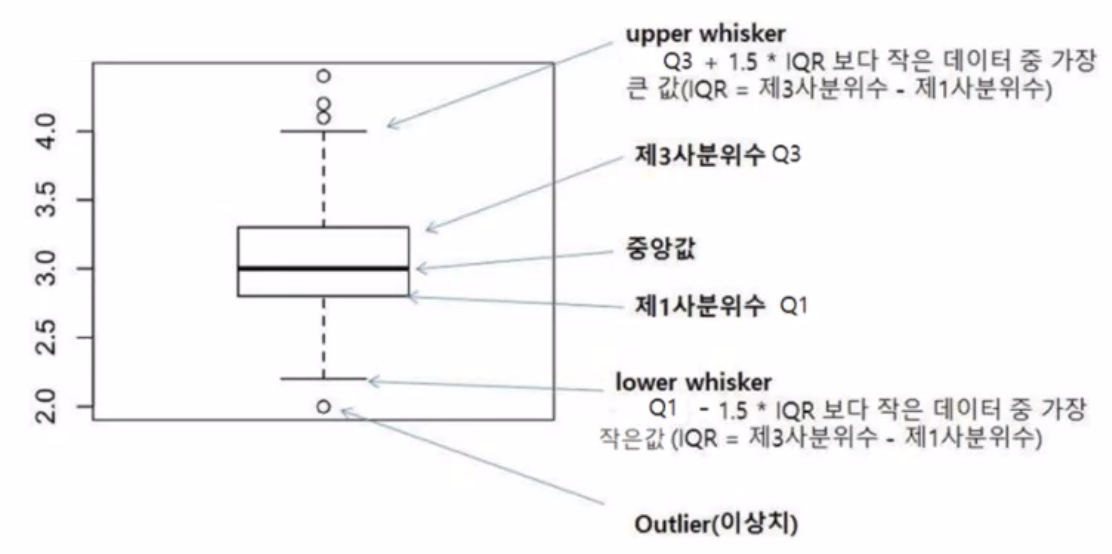

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb2d1fa1100>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb2d1fa1760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb2d1f8bc70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2d1fa1e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb2d1fac250>],
 'means': []}

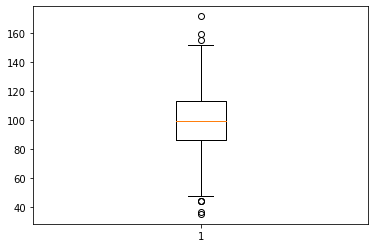

In [54]:
import matplotlib.pyplot as plt

plt.boxplot(data)

### 기술통계량 계산 함수 : describe()

- 관측값수, 범위, 평균, 분산, 왜도, 첨도 계산
- pandas.Series.describe(percentiles=None, include=None, exclude=None, datatime_is_numeric=False)
- pandas.DataFrame.describe(percentiles=None, include=None, exclude=None, datatime_is_numeric=False)
- scipt.stats.descirbe(a[,axis,ddof=1,bias,nan_policy])

In [55]:
describe(data)
describe(df['english']) # 표본집단 데이터에 대한 기술통계량

DescribeResult(nobs=1000, minmax=(35.37889984161376, 171.43158436052622), mean=99.20871727838417, variance=401.03130940853094, skewness=-0.029040113501245676, kurtosis=-0.02543852877769215)

DescribeResult(nobs=50, minmax=(37, 79), mean=58.38, variance=96.03632653061224, skewness=-0.3167932532496243, kurtosis=-0.38870454364589113)

In [56]:
df['english'].describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

In [57]:
describe(df['english'], ddof=0) # ddof= 0 : 모집단 데이터에 대한 기술통계량

DescribeResult(nobs=50, minmax=(37, 79), mean=58.38, variance=94.1156, skewness=-0.3167932532496243, kurtosis=-0.38870454364589113)